Support Vector Machine (SVM) Implementation
===========================================

**Author:** Srikar Kalle  
**Student ID:** C00313529  

-----------
# Change Log:
-----------

v1.2
- Fixed decision boundary visualization issue by training an SVM model with only two features
- Updated dataset handling to use only 'bill_length_mm' and 'bill_depth_mm' for visualization

v1.1
- Replaced synthetic dataset with a real Kaggle dataset
- Implemented CRISP-DM framework
- Added hyperparameter tuning using GridSearchCV
- Improved decision boundary visualization
- Introduced structured logging

v1.0
- Initial implementation with basic SVM classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Step 1: Business Understanding
logging.info("Business Understanding: Classifying data using Support Vector Machines (SVM).")

2025-02-21 18:41:50,879 - INFO - Business Understanding: Classifying data using Support Vector Machines (SVM).


In [5]:
# Step 2: Data Understanding
logging.info("Loading dataset...")
data = sns.load_dataset('penguins').dropna()
logging.info(f"Dataset loaded with shape {data.shape}")

2025-02-21 18:41:50,896 - INFO - Loading dataset...
2025-02-21 18:41:51,000 - INFO - Dataset loaded with shape (333, 7)


In [6]:
# Selecting numerical features & encoding target
X = data[['bill_length_mm', 'bill_depth_mm']]
y = data['species'].astype('category').cat.codes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logging.info("Data split into training and testing sets.")

2025-02-21 18:41:51,058 - INFO - Data split into training and testing sets.


In [8]:
# Step 3: Model Training & Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [9]:
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
logging.info("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
logging.info("Best parameters found: %s", grid_search.best_params_)


2025-02-21 18:41:51,096 - INFO - Starting hyperparameter tuning...
2025-02-21 18:41:51,652 - INFO - Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [10]:
# Step 4: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logging.info(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

2025-02-21 18:41:51,672 - INFO - Model Accuracy: 0.9552


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.86      0.92      0.89        13
           2       0.96      0.96      0.96        23

    accuracy                           0.96        67
   macro avg       0.94      0.95      0.94        67
weighted avg       0.96      0.96      0.96        67



In [11]:
# Step 5: Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("SVM Decision Boundary")
    plt.show()

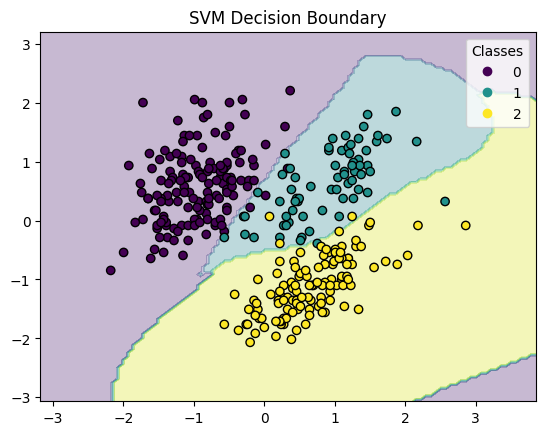

2025-02-21 18:41:52,796 - INFO - SVM model trained and evaluated successfully.


In [12]:
plot_decision_boundary(best_model, X_scaled, y)

logging.info("SVM model trained and evaluated successfully.")